# **ETL GOOGLE_SITIOS**

## 1. Importación de Librerías

In [1]:
import pandas as pd  # Cargamos la libreria de "pandas" para la manipulación y el análisis de datos
import numpy as np  # Cargamos la librería de "numpy" para realizar cálculos lógicos y matemáticos sobre cuadros y matrices en el caso que lo necesitemos
import pyarrow  # Cargando la librería "json" nos permitira manipular archivos tipo parquet
import matplotlib.pyplot as plt  # Cargarmos la libreria de "matplotlib" para graficar la relación que existen entre variables
import json  # Cargando la librería "json" nos permitira manipular archivos tipo JSON
import seaborn as sns  # Cargarmos la libreria de "seaborn" para graficar la relacion que existen entre las variables
import folium  # Cargamos la biblioteca folium para visualizaciones de mapas
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download("stopwords")
nltk.download("punkt")
import warnings

warnings.filterwarnings("ignore")
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. ETL (Extract - Transform - Load)

### 2.1. Carga de DataSet

In [2]:
# Instanciamos la ruta del archivo PARQUET
sitios_ruta = (
    r"/content/drive/MyDrive/PF-YELP-GOOGLE/Dataset_Limpia/df_sitios_no_clean.parquet"
)

In [3]:
# Leemos el archivo PARQUET lo cargamos a nuestro script
df_sitios = pd.read_parquet(sitios_ruta)

In [4]:
# Visualizamos los primeras 5 filas del archivo cargado en un DataFrame
df_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


### 2.2. Analisís Descriptivo del Dataset

#### 2.2.1. Definición de las Funciones Descriptivas del Dataset

In [5]:
# Definimos algunas funciones para que nos facilita la descripcion de las principales caracteristicas del DataFrame
def caracteristicas_df(df):
    """
    Describe de forma general la base de datos .

    Esta función simplemente muestra el tamaño, información general y
    la cantidad de datos nulos.

    Parametros
    ----------
    df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
    ----------
        - 'df.shape': Numero de filas y columnas
        - 'df.info': Muestra información general del DataFrame

    """
    print(
        "*" * 10 + "|" * 10 + "FORMA DE BASE DE DATOS" + "|" * 10 + "*" * 10,
        end="\n" * 2,
    )
    print(f"Tiene {df.shape[0]} filas y {df.shape[1]} columnas o variables")
    print(end="\n" * 2)

    print(
        "*" * 10
        + "|" * 10
        + "INFORMACION GENERAL DE LA BASE DE DATOS"
        + "|" * 10
        + "*" * 10,
        end="\n" * 2,
    )
    print(df.info(), end="\n" * 2)


def valores_nulos_df(df):
    """
    Revisa presencia de valores nulos en un DataFrame.
    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    el porcentaje de valores no nulos y nulos, así como la ncantidad de valores nulos por columna.

    Parametros:
    ----------
    df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
    ----------
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre': Nombre de cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.

    """
    mi_df = {"nombre": [], "tipo_datos": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_df["nombre"].append(columna)
        mi_df["tipo_datos"].append(df[columna].apply(type).unique())
        mi_df["nulos_%"].append(round(100 - porcentaje_no_nulos, 2))
        mi_df["nulos"].append(df[columna].isnull().sum())

    df_nulos = pd.DataFrame(mi_df)

    return df_nulos

#### 2.2.2. Descripcion del Dataset

In [6]:
# Llamamos a la función creada para visualizar las caracteristicas generales del Dataset
caracteristicas_df(df_sitios)

**********||||||||||FORMA DE BASE DE DATOS||||||||||**********

Tiene 3025011 filas y 15 columnas o variables


**********||||||||||INFORMACION GENERAL DE LA BASE DE DATOS||||||||||**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 346.2+ MB
None



In [7]:
# Llamamos a la función creada para visualizar las caracteristicas generales del Dataset
valores_nulos_df(df_sitios)

,nombre,tipo_datos,nulos_%,nulos
0,name,"[<class 'str'>, <class 'NoneType'>]",0.00,47
1,address,"[<class 'str'>, <class 'NoneType'>]",2.79,84346
2,gmap_id,[<class 'str'>],0.00,0
3,description,"[<class 'NoneType'>, <class 'str'>]",91.86,2778786
4,latitude,[<class 'float'>],0.00,0
5,longitude,[<class 'float'>],0.00,0
6,category,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",0.61,18361
7,avg_rating,[<class 'float'>],0.00,0
8,num_of_reviews,[<class 'int'>],0.00,0
9,price,"[<class 'NoneType'>, <class 'str'>]",91.20,2758902


#### 2.2.3. Revisamos algunos datos de columnas para conocer su estructura (las más complejas de acuerdo con nuestra tabla):

Realizamos esta fase inicial de detalle de las columnas de nuestros datos para entender su contenido. Este proceso nos permite planificar con mayor precisión las transformaciones y mejoras que podríamos aplicar.



In [8]:
# Seleccionamos un datos aleatorio en la columna 'name' para ver el contenido
df_sitios["name"][1000]

'Vonbernd K9 Training Ctr LLC'

In [9]:
# Seleccionamos un datos aleatorio en la columna 'address' para ver el contenido
df_sitios["address"][10]

'Lush Family Dental, 2505 SE Encompass Dr, Waukee, IA 50263'

In [10]:
# Seleccionamos un datos aleatorio en la columna 'gmap_id' para ver el contenido
df_sitios["gmap_id"][100]

'0x883f7c183866dda1:0x2c1c42b51348c0e0'

In [11]:
# Seleccionamos un datos aleatorio en la columna 'category' para ver el contenido
df_sitios["category"][1003]

array(['Post office', 'Logistics service', 'Money order service',
       'Shipping and mailing service'], dtype=object)

In [12]:
# Seleccionamos un datos aleatorio en la columna 'hours' para ver el contenido
df_sitios["hours"][9000]

array([array(['Wednesday', '6AM–10PM'], dtype=object),
       array(['Thursday', '6AM–10PM'], dtype=object),
       array(['Friday', '6AM–10PM'], dtype=object),
       array(['Saturday', '6AM–10PM'], dtype=object),
       array(['Sunday', '6AM–10PM'], dtype=object),
       array(['Monday', '6AM–10PM'], dtype=object),
       array(['Tuesday', '6AM–10PM'], dtype=object)], dtype=object)

In [13]:
# Seleccionamos un datos aleatorio en la columna 'MISC' para ver el contenido
df_sitios["MISC"][1000]

{'Accessibility': array(['Wheelchair accessible entrance'], dtype=object),
 'Activities': None,
 'Amenities': None,
 'Atmosphere': None,
 'Crowd': None,
 'Dining options': None,
 'From the business': None,
 'Getting here': None,
 'Health & safety': None,
 'Health and safety': None,
 'Highlights': None,
 'Lodging options': None,
 'Offerings': None,
 'Payments': None,
 'Planning': None,
 'Popular for': None,
 'Recycling': None,
 'Service options': None}

In [14]:
# Seleccionamos un datos aleatorio en la columna 'MISC' para ver el contenido
df_sitios["relative_results"][100]

array(['0x883f7d259fceda93:0x4d343c343e6bf200',
       '0x883f7e07a869091b:0xc3556de040ca7d15',
       '0x88408f0e7e2cb68f:0x6e415b2f0afc22e0',
       '0x884086aa73292edd:0x7844bcfd199cf824',
       '0x8840821365e33b15:0xecb1500635dbb014'], dtype=object)

In [15]:
# Seleccionamos un datos aleatorio en la columna 'url' para ver el contenido
df_sitios["url"][100]

'https://www.google.com/maps/place//data=!4m2!3m1!1s0x883f7c183866dda1:0x2c1c42b51348c0e0?authuser=-1&hl=en&gl=us'

Este conjunto contiene 15 columnas y con 3,025,011 de filas en total, aún contienen nulos en algunas columnas. Las columnas que contiene son:

*   **name:** Nombre del negocio o comercio.
*   **address:** Dirección del negocio o comercio .
*   **gmap_id:** Es el marcador especifico o id especifico de un elemento en Google Maps .
*   **description:** Una pequeña descrición del negocio o comercio.
*   **latitude:** Distancia respecto a la línea Ecuatorial.
*   **longitude:** Distancia respecto al meridiano de Greenwich.
*   **category:** Categoria del negocio o comercio a la cual pertenece.
*   **avg_rating:** Calificación promedio del negocio o comercio.
*   **num_of_reviews:** Número de calificaciones.
*   **price:** Precio.
*   **hours:** Horarios donde el negocio o comercio esta disponible.
*   **MISC:** Miscelaneos que ofrecen el negocio o comercio .
*   **state:** Status de disponibilidad del negocio o comercio.
*   **relative_results:** Resultados relativos.
*   **url:** Dirección de la página web del negocio o comercio.

### 2.3. Transformación de Datos

#### 2.3.1. Funciones de Transformación

In [16]:
def verifica_duplicados(df, columna):
    """
    Verifica y muestra filas duplicadas en un DataFrame basado en una columna específica.

    Esta función toma como entrada un DataFrame y el nombre de una columna específica.
    Luego, identifica las filas duplicadas basadas en el contenido de la columna especificada,
    las filtra y las ordena para una comparación más sencilla.

    Parameters:
    ----------
        df (pandas.DataFrame): El DataFrame en el que se buscarán filas duplicadas.
        columna (str): El nombre de la columna basada en la cual se verificarán las duplicaciones.

    Returns:
    ----------
        pandas.DataFrame or str: Un DataFrame que contiene las filas duplicadas filtradas y ordenadas,
        listas para su inspección y comparación, o el mensaje "No hay duplicados" si no se encuentran duplicados.
    """
    # Se filtran las filas duplicadas
    duplicated_rows = df[df.duplicated(subset=columna, keep=False)]
    if duplicated_rows.empty:
        return "No hay duplicados"

    # se ordenan las filas duplicadas para comparar entre sí
    duplicated_rows_sorted = duplicated_rows.sort_values(by=columna)
    return duplicated_rows_sorted


def categorias_a_ids(df):
    """
    Convierte las categorías en IDs y crea un enlace entre ellos.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene las categorías y los identificadores (gmap_id).
        Debe contener las columnas 'category' y 'gmap_id'.

    Returns:
    -----------
    df_categories : pandas.DataFrame
        DataFrame que contiene las categorías únicas y sus IDs asignados.
        Tiene dos columnas: 'description' para las categorías y 'id_cat' para sus IDs.

    Steps:
    -----------
    1. Guarda la columna 'gmap_id' antes de modificar el DataFrame original.
    2. Convierte las listas de categorías en cadenas.
    3. Divide las categorías en columnas separadas.
    4. Mezcla las columnas en una sola columna 'categories_id'.
    5. Crea un DataFrame con descripciones únicas y asigna IDs.
    """
    # Guarda la columna 'gmap_id' antes de modificar el DataFrame original
    gmap_id_column = df["gmap_id"].copy()

    # Convierte las listas de categorías en cadenas
    df["category"] = df["category"].apply(", ".join)

    # Divide las categorías en columnas separadas (categories_split)
    categories_split = df["category"].str.split(", ", expand=True)

    # Mezcla las columnas en una sola columna 'categories_id'
    categories_stacked = (
        categories_split.stack().reset_index(level=1, drop=True).rename("categories_id")
    )

    # Crea un DataFrame con descripciones únicas y asigna IDs (categories_id)
    df_categories = pd.DataFrame(
        {"categories_id": categories_stacked.unique()}
    ).reset_index(drop=True)
    df_categories["id_cat"] = df_categories.index + 1

    return df_categories


def categorizar_estado(x):
    """
    Categoriza el estado de un establecimiento en 'Closed', 'Temporarily closed' o 'Open'
    basado en la descripción proporcionada.

    Parameters:
    -----------
    - x: Descripción del estado del establecimiento.

    Returns:
    -----------
    - str: Categoría del estado ('Closed', 'Temporarily closed' o 'Open').

    Ejemplo:
    -----------
    Si x es 'Permanently closed', retornará 'Closed'.
    Si x es 'Temporarily closed until further notice', retornará 'Temporarily closed'.
    Si x no contiene ninguna de las frases anteriores, retornará 'Open'.
    """
    # Si la descripción contiene 'Permanently closed', categorizar como 'Closed'
    if "Permanently closed" in str(x):
        return "Closed"
    # Si la descripción contiene 'Temporarily closed', categorizar como 'Temporarily closed'
    elif "Temporarily closed" in str(x):
        return "Temporarily closed"
    # Si no contiene ninguna de las frases anteriores, categorizar como 'Open'
    else:
        return "Open"


def extraer_ciudad_y_estado(direccion):
    """
    Extrae la ciudad y el estado de la dirección proporcionada.

    Parameters:
    -----------
        direccion (str): La cadena de dirección completa que contiene ciudad, estado y posiblemente otras partes.

    Returns:
    -----------
        tuple: Una tupla que contiene la ciudad y el estado extraídos. Si la extracción falla, devuelve (None, None).

    Ejemplos:
        >>> extraer_ciudad_y_estado("Lush Family Dental, 2505 SE Encompass Dr, Waukee, IA 50263")
        ('Waukee', 'IA')
        >>> extraer_ciudad_y_estado("123 Calle Principal, Pueblo Pequeño, NY 12345")
        ('Pueblo Pequeño', 'NY')
        >>> extraer_ciudad_y_estado("Dirección sin ciudad y estado")
        (None, None)
    """
    try:
        # Dividir la dirección en partes usando la coma como separador
        partes = direccion.split(", ")

        # Asegurarse de que haya al menos tres partes (ciudad, estado_código postal)
        if len(partes) >= 3:
            ciudad = partes[2]  # Extraer la 3ra parte como ciudad
            estado_cod_postal = partes[
                -1
            ]  # Extraer la última parte que contiene estado y posiblemente código postal
            estado = estado_cod_postal.split()[
                -2
            ]  # Extraer el estado (asumiendo que es la penúltima parte)
            return ciudad, estado
        else:
            return (
                None,
                None,
            )  # Devolver None para ciudad y estado si tiene la configuración planteada
    except IndexError:
        return None, None  # Devolver None para ciudad y estado si la extracción falla

#### 2.3.2. Transformación, manejo de datos nulos o vacíos y eliminación de todo el Dataframe

In [17]:
# Observamos las columnas de nuestro Dataframe
df_sitios.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [18]:
# Vamos eliminar las columnas que no tienen suficiente relevenacia para nuestro analisis posterior
columnas_eliminar = ["description", "price", "relative_results", "url"]

# Eliminamos las columnas de nuestro Dataframe
df_sitios.drop(columnas_eliminar, axis=1, inplace=True)

print("Se han eliminado las columnas:", columnas_eliminar)

Se han eliminado las columnas: ['description', 'price', 'relative_results', 'url']


In [19]:
# Verificamos si se han eliminado
df_sitios.columns

Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'hours', 'MISC', 'state'],
      dtype='object')

#### 2.3.3. Transformación y eliminación de datos en la columna "name"

In [20]:
# Procedemos a eliminar los valores nulos de la columna "name"
df_sitios.dropna(subset=["name"], inplace=True)

In [21]:
# Verificamos si se han eliminado los valores nulos
valores_nulos_name = df_sitios[df_sitios["name"].isnull()]

if valores_nulos_name.empty:
    print("Se han eliminado todos los valores nulos de la columna 'name'.")
else:
    print("Aún hay valores nulos en la columna 'name'.")
    print(valores_nulos_name)

Se han eliminado todos los valores nulos de la columna 'name'.


#### 2.3.4. Transformación y eliminación de datos en la columna "address"

In [22]:
# Procedemos a eliminar los valores nulos de la columna "address"
df_sitios.dropna(subset=["address"], inplace=True)

In [23]:
# Verificamos si se han eliminado los valores nulos
valores_nulos_name = df_sitios[df_sitios["address"].isnull()]

if valores_nulos_name.empty:
    print("Se han eliminado todos los valores nulos de la columna 'address'.")
else:
    print("Aún hay valores nulos en la columna 'address'.")
    print(valores_nulos_name)

Se han eliminado todos los valores nulos de la columna 'address'.


In [24]:
# Aplicamos la función extraer_ciudad_y_estado a la columna 'address' y guardamos los resultados en nuevas columnas 'ciudad' y 'estado'
df_sitios[["city", "state_us"]] = df_sitios["address"].apply(
    lambda x: pd.Series(extraer_ciudad_y_estado(x))
)

In [25]:
# Verificamos los valores nulos que se puede haber creado
valores_nulos_df(df_sitios)

,nombre,tipo_datos,nulos_%,nulos
0,name,[<class 'str'>],0.00,0
1,address,[<class 'str'>],0.00,0
2,gmap_id,[<class 'str'>],0.00,0
3,latitude,[<class 'float'>],0.00,0
4,longitude,[<class 'float'>],0.00,0
5,category,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",0.62,18356
6,avg_rating,[<class 'float'>],0.00,0
7,num_of_reviews,[<class 'int'>],0.00,0
8,hours,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",26.83,789081
9,MISC,"[<class 'dict'>, <class 'NoneType'>]",22.12,650508


In [26]:
# Procedemos a eliminar los valores nulos de la columna "state_us"
df_sitios.dropna(subset=["state_us"], inplace=True)

# Procedemos a eliminar los valores nulos de la columna "city"
df_sitios.dropna(subset=["city"], inplace=True)

In [27]:
# Verificamos si se han eliminado los valores nulos
valores_nulos_name = df_sitios[df_sitios["state_us"].isnull()]

if valores_nulos_name.empty:
    print("Se han eliminado todos los valores nulos de la columna 'state_us'.")
else:
    print("Aún hay valores nulos en la columna 'state_us'.")
    print(valores_nulos_name)

Se han eliminado todos los valores nulos de la columna 'state_us'.


In [28]:
# Verificamos si se han eliminado los valores nulos
valores_nulos_name = df_sitios[df_sitios["city"].isnull()]

if valores_nulos_name.empty:
    print("Se han eliminado todos los valores nulos de la columna 'city'.")
else:
    print("Aún hay valores nulos en la columna 'city'.")
    print(valores_nulos_name)

Se han eliminado todos los valores nulos de la columna 'city'.


In [29]:
# Eliminamos la columna "address" de nuestro Dataframe
df_sitios.drop("address", axis=1, inplace=True)
print("Se ha eliminado la columna: address")

Se ha eliminado la columna: address


#### 2.3.5. Transformación y eliminación de datos en la columna "gmap_id"

In [30]:
# Se observa que hay 53146 duplicados, por lo tanto vamos eliminarlos
df_sitios.drop_duplicates(subset=["gmap_id"], inplace=True, keep="first")
print("Se han eliminado los valores duplicados de la columna gmap_id")

Se han eliminado los valores duplicados de la columna gmap_id


#### 2.3.6. Transformación y eliminación de datos en la columna "category"

In [31]:
# Procedemos a eliminar los valores nulos de la columna "category"
df_sitios.dropna(subset=["category"], inplace=True)

In [32]:
# Verificamos si se han eliminado los valores nulos
valores_nulos_category = df_sitios[df_sitios["category"].isnull()]

if valores_nulos_category.empty:
    print("Se han eliminado todos los valores nulos de la columna 'category'.")
else:
    print("Aún hay valores nulos en la columna 'category'.")
    print(valores_nulos_category)

Se han eliminado todos los valores nulos de la columna 'category'.


Vamos a proceder a desglosar la columna de "category" para dividirla en partes más pequeñas, lo que nos permitirá tener una mayor granularidad de los datos y mejorar su calidad.

En este apartado, llevaremos a cabo un breve análisis de los datos presentes en nuestra columna "category". Este análisis es fundamental, ya que nos ayudará a delimitar el alcance de nuestro proyecto y a definir claramente el problema que abordaremos en nuestro análisis final.

In [33]:
# Procedemos a explotar los valores y visualizarlo la columna "category" para atomizar
categorias_unicas = df_sitios["category"].explode().unique().tolist()
print((categorias_unicas))

['Pharmacy', 'Textile exporter', 'Korean restaurant', 'Fabric store', 'Restaurant', 'Nail salon', 'Waxing hair removal service', 'Bakery', 'Health food restaurant', 'Dentist', 'Cosmetic dentist', 'Dental clinic', 'Auto glass shop', 'Window tinting service', 'Beauty salon', 'Ski rental service', 'Snowboard rental service', 'Corporate office', 'Massage spa', 'Chiropractor', 'Massage', 'Massage therapist', 'Medical clinic', 'Paint store', 'Paint manufacturer', 'Spa', 'Convenience store', 'Locksmith', 'Emergency locksmith service', 'Key duplication service', 'Security system installer', 'Home inspector', 'Window treatment store', 'Blinds shop', 'Photographer', 'Beverage distributor', 'Medical supply store', 'Wheelchair rental service', 'Transportation service', 'Drug store', 'Vitamin & supplements store', 'Delivery service', 'Employment agency', 'Auto electrical service', 'Cell phone store', 'Furniture store', 'Bedroom furniture store', "Children's furniture store", 'Mattress store', 'Sofa

Procederemos a graficar la distribucion de categorias en todo el dataframe

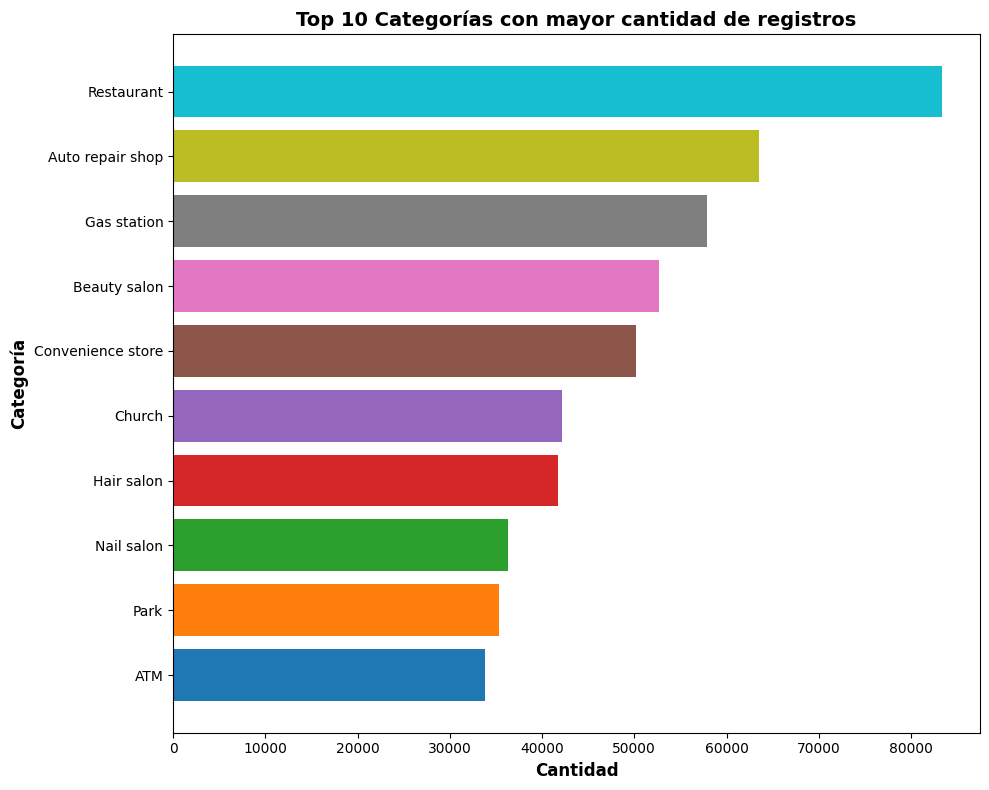

In [34]:
# Explotamos la columna 'category' para transformar cada elemento de la lista en una fila separada
categorias_explotadas = df_sitios["category"].explode()

# Realizamos value_counts() para contar las ocurrencias de cada categoría
conteo_categorias = categorias_explotadas.value_counts()

# Seleccionamos las 10 principales categorías
top_10_categorias = conteo_categorias.nlargest(10)

# Ordenamos las categorías en orden descendente según el conteo
top_10_categorias_ordenadas = top_10_categorias.sort_values(ascending=True)

# Generamos una lista de colores diferentes
colores = plt.cm.tab10(np.arange(len(top_10_categorias_ordenadas)))

# Graficamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(
    top_10_categorias_ordenadas.index, top_10_categorias_ordenadas.values, color=colores
)
plt.xlabel("Cantidad", fontsize=12, fontweight="bold")
plt.ylabel("Categoría", fontsize=12, fontweight="bold")
plt.title(
    "Top 10 Categorías con mayor cantidad de registros", fontsize=14, fontweight="bold"
)
plt.tight_layout()
plt.show()

Vamos aplicar la función "categorias_a_ids" para extraer 01 dataframe que nos permitiran normalizar nuestros datos, aquí tenemos nuestra tabla de dimensión:
- df_categories : DataFrame que contiene las categorías únicas y sus IDs asignados.Tiene dos columnas: 'description' para las categorías y 'id_cat' para sus IDs.


In [35]:
# Aplicamos la función de transformación categorias a ids
df_sitios_categories_resultado = categorias_a_ids(df_sitios.copy())

In [36]:
# Visualizamos los nuevos Dataframe que hemos obtenido "df_sitios_categories_resultado" para normalizar
df_sitios_categories_resultado.head()

,categories_id,id_cat
0,Pharmacy,1
1,Textile exporter,2
2,Korean restaurant,3
3,Fabric store,4
4,Restaurant,5


In [37]:
# Verificamos valores nulos de nuestro Dataframe "df_sitios_categories_resultado"
valores_nulos_df(df_sitios_categories_resultado)

,nombre,tipo_datos,nulos_%,nulos
0,categories_id,[<class 'str'>],0.0,0
1,id_cat,[<class 'int'>],0.0,0


Finalmente, procederemos a descomponer la columna 'category' en el DataFrame original para su posterior análisis.

In [38]:
# Procedemos a explotar la columna "category" ya que tiene una lista de diccionarios
df_sitios = df_sitios.explode("category")
df_sitios.head()

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,city,state_us
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,Cochran,GA
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,Textile exporter,4.5,6,None,None,Open now,Los Angeles,CA
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,Los Angeles,CA
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,Los Angeles,CA
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,Los Angeles,CA


Procederemos a agrupar las categorías y segmentos más generales, como por ejemplo "salones de belleza", "restaurantes", "hoteles", entre otros. Este proceso nos permitirá obtener una visión más amplia y clara de todas las categorías presentes en nuestros datos, lo que nos ayudará a tomar decisiones informadas y mejor fundamentadas.

En este caso, emplearemos la biblioteca NLTK para procesar el texto y eliminar información superflua y realizaremos un recuento de palabras.

In [39]:
# Obtenemos la lista de stop words en inglés
stop_words = set(stopwords.words("english"))

# Convertimos todos los strings en la columna "categories_id" a minúsculas
df_sitios_categories_resultado["categories_id"] = (
    df_sitios_categories_resultado["categories_id"].copy().astype(str).str.lower()
)

In [40]:
# Tokenizamos la columna "categories_id" y filtramos las stop words
tokens = df_sitios_categories_resultado["categories_id"].apply(word_tokenize)
tokens_no_stopwords = tokens.apply(
    lambda x: [word for word in x if word not in stop_words]
)

# Contamos la frecuencia de cada palabra
frecuencia_palabras = Counter(
    word for sublist in tokens_no_stopwords for word in sublist
)

# Ordenamos las palabras por frecuencia
palabras_ordenadas = sorted(
    frecuencia_palabras.items(), key=lambda x: x[1], reverse=True
)

# Mostramos las 20 palabras más frecuentes
print("Palabras más frecuentes: ")
for palabra, frecuencia in palabras_ordenadas[:30]:
    print(f"{palabra}: {frecuencia}")

Palabras más frecuentes: 
store: 365
service: 358
restaurant: 294
supplier: 246
shop: 176
school: 126
dealer: 97
club: 93
company: 88
center: 88
equipment: 82
repair: 74
agency: 73
office: 72
manufacturer: 70
wholesaler: 66
rental: 65
supply: 58
contractor: 49
church: 48
department: 46
food: 41
home: 36
public: 35
water: 35
clinic: 34
consultant: 33
services: 32
station: 31
auto: 30


In [41]:
# Definimos la ruta para guardar el archivo CSV
ruta_archivo = (
    "/content/drive/MyDrive/PF-YELP-GOOGLE/Dataset_Limpia/palabras_ordenadas.csv"
)

# Guardamos las palabras ordenadas en un archivo CSV para hacer la agrupacion
df_palabras_ordenadas = pd.DataFrame(
    palabras_ordenadas, columns=["Palabra", "Frecuencia"]
)
df_palabras_ordenadas.to_csv(ruta_archivo, index=False)

Nuestra clasificacion se baso en lo indicado por el (North American Industry Classification System) más conocido como la NAICS. Luego, realizaremos un recuento de palabras clave y finalmente graficamos.

In [42]:
# Definimos las palabras clave para cada categoría
palabras_clave = {
    "Stores": {
        "store",
        "shop",
        "wholesaler",
        "market",
        "kiosk",
        "winery",
        "jewelry",
        "jewel",
        "alcohol",
        "wholesalers",
        "jewellry",
    },
    "Manufacturing": {
        "manufacturer",
        "contractor",
        "furniture",
        "exporter",
        "importer",
        "equipment",
    },
    "Retail": {"supplier", "dealer", "equipment", "supply", "plant", "gift", "retail"},
    "Finance_Insurance": {
        "center",
        "company",
        "agency",
        "office",
        "insurance",
        "finance",
        "organization",
        "business",
        "ATM",
    },
    "HealthCare_SocialAssistance": {
        "clinic",
        "care",
        "health",
        "medical",
        "dental",
        "dentist",
        "pharmacy",
        "surgeon",
        "optician",
        "vacuum",
        "medicine",
        "hospital",
        "doctor",
        "lab",
        "pediatric",
        "relief",
    },
    "Entertainment_Recreation": {
        "home",
        "museum",
        "park",
        "farm",
        "house",
        "theater",
        "music",
        "gym",
        "sports",
    },
    "Food_Services": {
        "restaurant",
        "food",
        "cafe",
        "bar",
        "bakery",
        "rice",
        "chocolate",
        "restaurants",
        "gastropub",
        "meal",
        "fishing",
        "meat",
    },
    "Beauty_Services": {"salon", "hair", "massage", "barber", "spa", "nail"},
    "Hotels": {"hotel", "hostel", "hostal", "aparment", "deparment", "club"},
    "Education": {"library", "school", "courses", "course", "study"},
    "Religion": {"church", "religius"},
    "General_Services": {
        "service",
        "repair",
        "rental",
        "consultant",
        "services",
        "auto",
        "engineer",
        "machine",
        "restoration",
        "machinery",
        "wash",
        "pump",
        "station",
        "fuel",
        "gas",
    },
}

In [43]:
# Definimos el Dataframe donde vamos a realizar el conteo
df_recategorizacion = categorias_explotadas.to_frame()
df_recategorizacion.head()

,category
0,Pharmacy
1,Textile exporter
2,Korean restaurant
3,Fabric store
4,Fabric store


In [44]:
# Revisamos el tamaño del Dataframe
df_recategorizacion.shape

(4906929, 1)

In [45]:
# Convertimos el texto de la columna "categories_id" a minúsculas
df_recategorizacion["category"] = df_recategorizacion["category"].str.lower()

# Aplicamos la función lambda a cada fila del DataFrame y guardar los resultados en una nueva columna
df_recategorizacion["categoria"] = df_recategorizacion["category"].apply(
    lambda x: next(
        (
            categoria
            for categoria, palabras in palabras_clave.items()
            if any(palabra in x for palabra in palabras)
        ),
        "Others",
    )
)

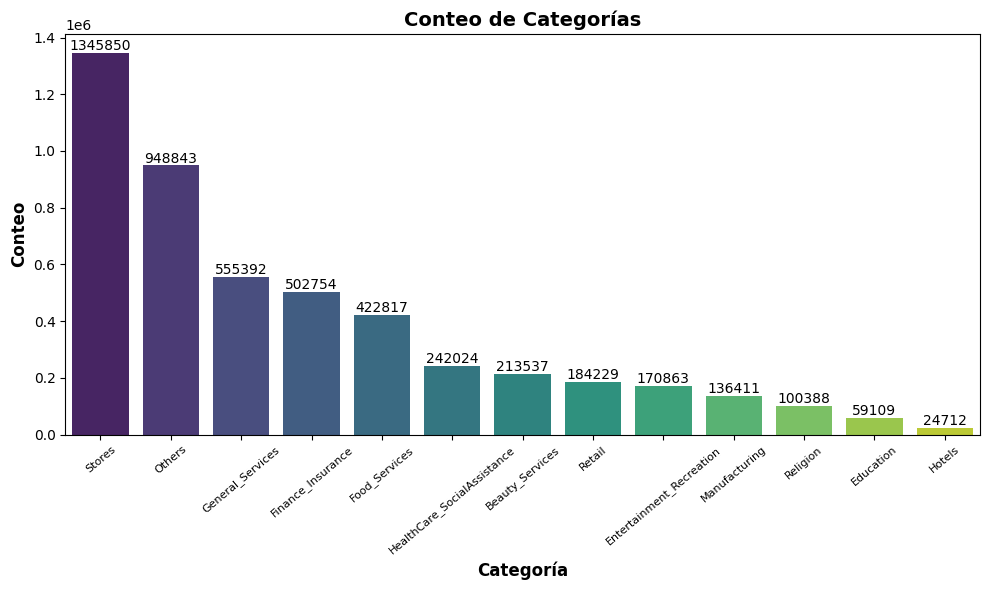

In [46]:
# Contamos la frecuencia de cada categoría
conteo_categorias = df_recategorizacion["categoria"].value_counts()

# Graficamos el conteo de categorías con colores diferentes para cada barra y mostrar el conteo en la parte superior
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=conteo_categorias.index, y=conteo_categorias.values, palette="viridis"
)
plt.title("Conteo de Categorías", fontsize=14, fontweight="bold")
plt.xlabel("Categoría", fontsize=12, fontweight="bold")
plt.ylabel("Conteo", fontsize=12, fontweight="bold")
plt.xticks(rotation=40, fontsize=8)
plt.tight_layout()

# Mostramos el conteo en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()

Se puede observar que el tipo de negocio que predomina con mayor frecuencia es el de "Stores", seguido de "Others". Cabe resaltar que "Others" es el resultado de la suma de numerosas subcategorías que individualmente tienen valores pequeños en comparación.

#### 2.3.7. Transformación y eliminación de datos en la columna "hours"

In [47]:
# Eliminamos filas con valores nulos en la columna 'hours'
df_sitios.dropna(subset=["hours"], inplace=True)

In [48]:
# Verificamos si se han eliminado los valores nulos
valores_nulos_category = df_sitios[df_sitios["hours"].isnull()]

if valores_nulos_category.empty:
    print("Se han eliminado todos los valores nulos de la columna 'hours'.")
else:
    print("Aún hay valores nulos en la columna 'hours'.")
    print(valores_nulos_category)

Se han eliminado todos los valores nulos de la columna 'hours'.


In [49]:
# Generar un rango de identificadores únicos para las horas
df_sitios["id_hours"] = range(1, len(df_sitios) + 1)

# Convertimos la lista de horas en un formato más legible
df_sitios["schedule"] = df_sitios["hours"].apply(
    lambda x: ", ".join([f"{day} {hours}" for day, hours in x])
)

# Seleccionamos solo las columnas necesarias para la tabla de horas
tabla_hours = df_sitios[["id_hours", "schedule"]]

# Eliminamos la columna 'hours' del DataFrame principal
df_sitios.drop("hours", axis=1, inplace=True)

# Fusionamos la tabla de horas con el DataFrame principal
df_sitios = df_sitios.merge(tabla_hours, on="id_hours", how="left")

# Eliminamos las columnas redundantes
df_sitios.drop(["id_hours"], axis=1, inplace=True)

In [50]:
# Eliminamos la columna "schedule_x"
df_sitios.drop(["schedule_x"], axis=1, inplace=True)

# Cambiamos de nombre la columna "schedule_y" a "horario"
df_sitios = df_sitios.rename(columns={"schedule_y": "horario"})

In [51]:
# Verificamos
df_sitios.columns

Index(['name', 'gmap_id', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'MISC', 'state', 'city', 'state_us', 'horario'],
      dtype='object')

#### 2.3.8. Transformación y eliminación de datos en la columna "MISC"

In [52]:
# Convertimos el contenido de la columna 'MISC' a diccionarios
df_sitios["MISC"] = df_sitios["MISC"].apply(
    lambda x: json.loads(x.replace("'", '"')) if isinstance(x, str) else x
)

# Explorar la columna 'MISC' para los primeros 10 registros
for index, row in df_sitios.head(5).iterrows():
    misc_info = row["MISC"]
    if misc_info is not None:
        print(f"Fila {index}:")
        for key, value in misc_info.items():
            print(f"  {key}: {value}")
        print("=" * 30)

Fila 0:
  Accessibility: ['Wheelchair accessible entrance']
  Activities: None
  Amenities: None
  Atmosphere: None
  Crowd: None
  Dining options: None
  From the business: None
  Getting here: None
  Health & safety: ['Mask required' 'Staff required to disinfect surfaces between visits']
  Health and safety: None
  Highlights: None
  Lodging options: None
  Offerings: None
  Payments: None
  Planning: ['Quick visit']
  Popular for: None
  Recycling: None
  Service options: ['In-store shopping' 'Same-day delivery']
Fila 1:
  Accessibility: ['Wheelchair accessible entrance']
  Activities: None
  Amenities: ['Good for kids']
  Atmosphere: ['Casual']
  Crowd: None
  Dining options: None
  From the business: None
  Getting here: None
  Health & safety: None
  Health and safety: None
  Highlights: None
  Lodging options: None
  Offerings: ['Comfort food']
  Payments: None
  Planning: None
  Popular for: None
  Recycling: None
  Service options: ['Takeout' 'Dine-in' 'Delivery']
Fila 2:
  Ac

In [53]:
# Observamos que esta columna no nos va dar información relevante para nuestro posterior estudio o análisis
# Por lo tanto decidimos eliminar la columna "MISC"
# Eliminamos la columna "schedule_x"
df_sitios.drop(["MISC"], axis=1, inplace=True)

In [54]:
# Verificamos si se aplico el drop
df_sitios.columns

Index(['name', 'gmap_id', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'state', 'city', 'state_us', 'horario'],
      dtype='object')

#### 2.3.9. Transformación y eliminación de datos en la columna "state"

In [55]:
# Visualizamos los valores unicos de la columna "state"
contador_valores = df_sitios["state"].value_counts()
print(contador_valores)

state
Permanently closed                         337038
Closed ⋅ Opens 9AM                         251435
Open 24 hours                              251268
Closed ⋅ Opens 8AM                         223326
Open ⋅ Closes 5PM                          212520
                                            ...  
Open ⋅ Closes 2:12PM                            1
Closes soon ⋅ 2:45PM ⋅ Opens 6:30AM Wed         1
Closes soon ⋅ 3:05PM ⋅ Opens 8:40AM Wed         1
Closes soon ⋅ 3:30PM ⋅ Opens 5AM Wed            1
Closes soon ⋅ 2:30PM ⋅ Opens 6AM Sun            1
Name: count, Length: 5732, dtype: int64


In [56]:
# Aplicamos la función "categorizar_state" para definir 3 puntos de salida
df_sitios["state"] = df_sitios["state"].apply(categorizar_estado)

In [57]:
# Visualizamos el Dataframe
df_sitios.head()

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state,city,state_us,horario
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16,Open,Cochran,GA,"Friday 8AM–6PM, Saturday 8AM–12PM, Sunday Clos..."
1,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18,Open,Los Angeles,CA,"Thursday 6:30AM–6PM, Friday 6:30AM–6PM, Saturd..."
2,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6,Open,Los Angeles,CA,"Thursday 9AM–5PM, Friday 9AM–5PM, Saturday Clo..."
3,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7,Open,Los Angeles,CA,"Thursday 9AM–5PM, Friday 9AM–5PM, Saturday Clo..."
4,Matrix International Textiles,0x80c2cf163db6bc89:0x219484e2edbcfa41,34.015505,-118.181839,Fabric store,3.5,6,Open,Commerce,CA,"Thursday 8:30AM–5:30PM, Friday 8:30AM–5:30PM, ..."


#### 2.3.10. Filtración de nuestra data según la categoría "Convinence store" o palabras similares


Tras un minucioso análisis de los datos disponibles, hemos tomado la decisión de centrar nuestro estudio en la categoría de "Stores", específicamente en la subcategoría de "Convenience store", con el objetivo de focalizar aún más nuestra investigación.

Sin embargo, para lograr una visión más clara y filtrar todos los datos,en nuestro DataFrame original "df_sitios". De esta manera, podremos consolidar la información y tener una comprensión más completa de nuestros datos.

In [58]:
# Visualizamos el Dataframe
df_sitios.head()

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state,city,state_us,horario
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16,Open,Cochran,GA,"Friday 8AM–6PM, Saturday 8AM–12PM, Sunday Clos..."
1,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18,Open,Los Angeles,CA,"Thursday 6:30AM–6PM, Friday 6:30AM–6PM, Saturd..."
2,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6,Open,Los Angeles,CA,"Thursday 9AM–5PM, Friday 9AM–5PM, Saturday Clo..."
3,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7,Open,Los Angeles,CA,"Thursday 9AM–5PM, Friday 9AM–5PM, Saturday Clo..."
4,Matrix International Textiles,0x80c2cf163db6bc89:0x219484e2edbcfa41,34.015505,-118.181839,Fabric store,3.5,6,Open,Commerce,CA,"Thursday 8:30AM–5:30PM, Friday 8:30AM–5:30PM, ..."


In [59]:
# Visualizamos la dimensión del Dataframe
df_sitios.shape

(4135410, 11)

Nuevamente vamos a proceder a crear un gráfico de barras para visualizar la distribución de las categorías.

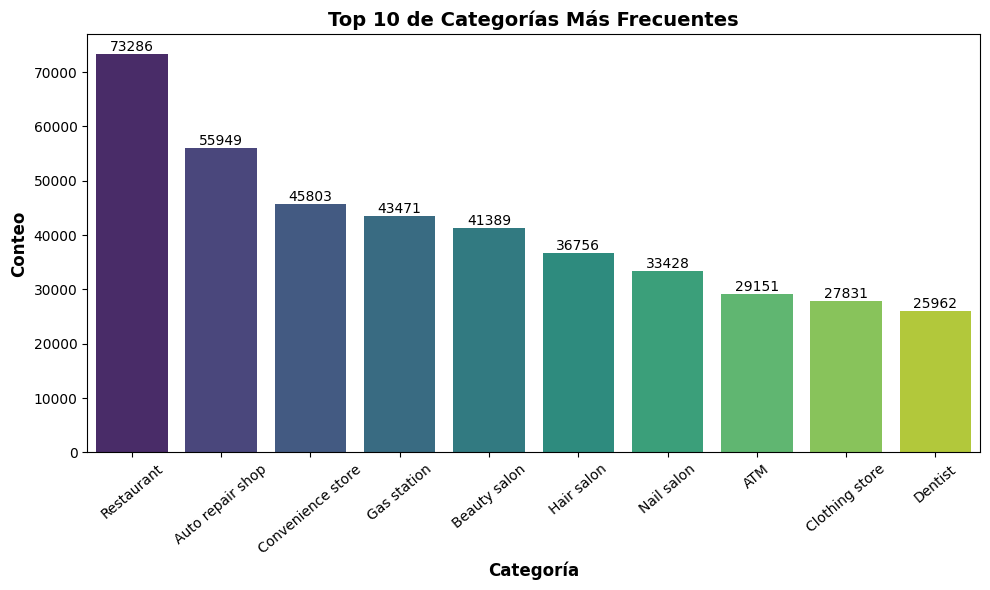

In [60]:
# Contamos la frecuencia de cada "categoría_id"
conteo_categorias_df_final = df_sitios["category"].value_counts()

# Seleccionamos solo las 10 categorías más frecuentes
top_10_categorias = conteo_categorias_df_final.head(10)

# Graficamos el conteo de las 10 categorías principales
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_10_categorias.index, y=top_10_categorias.values, palette="viridis"
)
plt.title("Top 10 de Categorías Más Frecuentes", fontsize=14, fontweight="bold")
plt.xlabel("Categoría", fontsize=12, fontweight="bold")
plt.ylabel("Conteo", fontsize=12, fontweight="bold")
plt.xticks(rotation=40)
plt.tight_layout()

# Mostramos el conteo en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()

Ahora nos disponemos a filtrar los datos y crear un gráfico de barras para visualizar la distribución de los negocios en la categoría de "Convenience store".

In [61]:
# Procedemos a filtrar por la categoria "Convinence store"
df_final_convenience = df_sitios[df_sitios["category"] == "Convenience store"]
df_final_convenience.head()

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state,city,state_us,horario
34,Timewise Food Store,0x8638869e6b4e3529:0xe8d257447fe41672,30.713368,-94.954344,Convenience store,4.8,4,Open,Livingston,TX,"Thursday Open 24 hours, Friday Open 24 hours, ..."
242,Maverik Adventure's First Stop,0x87528bb7ab938cb3:0x5ee996e34cc50715,40.698585,-111.906406,Convenience store,3.4,5,Open,South Salt Lake,UT,"Thursday Open 24 hours, Friday Open 24 hours, ..."
268,bp,0x881614cdcdd1f645:0xe524e597b7563b83,41.452031,-85.267893,Convenience store,4.0,4,Open,Kendallville,IN,"Thursday Open 24 hours, Friday Open 24 hours, ..."
360,Mike's Drive Thru,0x8665a07841a58faf:0xbd68d13ecd2835b0,26.185910,-98.169056,Convenience store,2.7,6,Open,Pharr,TX,"Thursday Open 24 hours, Friday Open 24 hours, ..."
449,Walgreens,0x89b865336dbfc08f:0x6762f78f2730a91f,38.874709,-75.824439,Convenience store,2.2,27,Open,Denton,MD,"Thursday 8AM–10PM, Friday 8AM–10PM, Saturday 8..."


In [62]:
# Visualizamos la dimensión del Dataframe
df_final_convenience.shape

(45803, 11)

Actualmente "Walgreens" y "Duane Reade" pertenecen a la misma franquicia, por lo tanto procederemos a cambiar el nombre "Duane Reade" a "Walgreens" para manipular los datos en esta etapa.

In [63]:
# Procedemos a renombrar los valores con valor "Duane Reade"
df_final_convenience["name"] = df_final_convenience["name"].replace(
    "Duane Reade", "Walgreens"
)

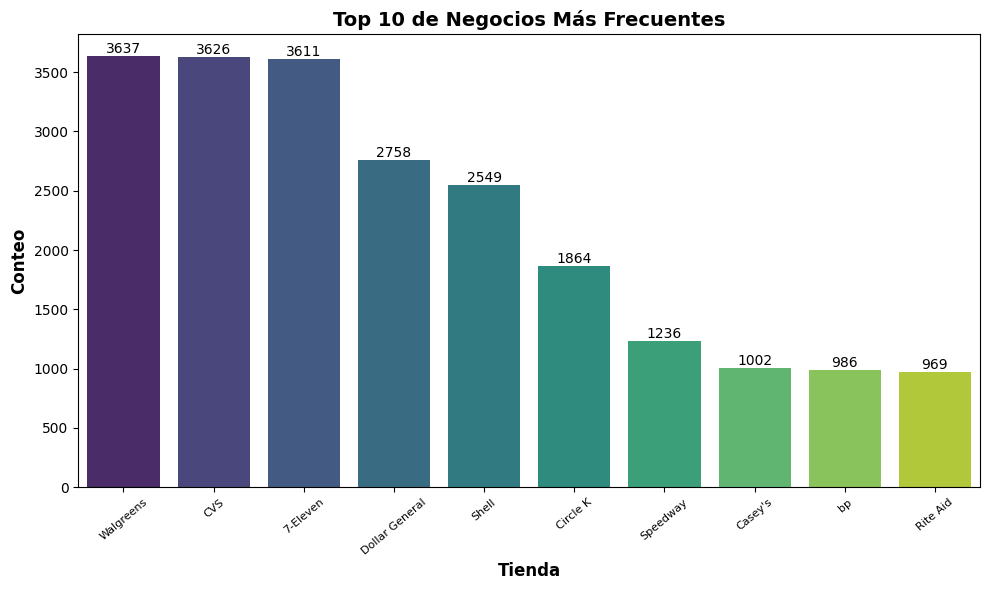

In [64]:
# Contamos la frecuencia de cada "categoría_id"
conteo_convenience_store = df_final_convenience["name"].value_counts()

# Seleccionamos solo las 10 categorías más frecuentes
top_10_categorias = conteo_convenience_store.head(10)

# Graficamos el conteo de las 10 categorías principales
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_10_categorias.index, y=top_10_categorias.values, palette="viridis"
)
plt.title("Top 10 de Negocios Más Frecuentes", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12, fontweight="bold")
plt.ylabel("Conteo", fontsize=12, fontweight="bold")
plt.xticks(rotation=40, fontsize=8)
plt.tight_layout()

# Mostramos el conteo en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()

Finalmente, llevaremos a cabo un breve análisis que nos proporcionará una comprensión más profunda del negocio de nuestra tienda seleccionada (Walgreens). Este análisis será fundamental para identificar las estrategias que utilizaremos en el futuro.

Realizaremos una evaluación del número de reseñas para nuestra tienda, así como para las de sus competidores directos.

In [65]:
# Filtramos el DataFrame para competidores de "Walgreens" en la categoría "Convenience store"
competidores_df = df_final_convenience[
    (df_final_convenience["category"].apply(lambda x: "Convenience store" in x))
    & (df_final_convenience["name"] != "Walgreens")
]

# Filtramos el DataFrame para "Walgreens"
walgreens_df = df_final_convenience[
    (df_final_convenience["name"] == "Walgreens")
    & (df_final_convenience["category"].apply(lambda x: "Convenience store" in x))
]

# Renombramos la columna 'num_of_reviews' para "Walgreens"
walgreens_df.rename(
    columns={"num_of_reviews": "num_of_reviews_walgreens"}, inplace=True
)

# Calculamos la suma total de reseñas para Walgreens y competidores
total_reviews = (
    competidores_df["num_of_reviews"].sum()
    + walgreens_df["num_of_reviews_walgreens"].sum()
)

# Calculamos el número de tiendas de Walgreens y sus reseñas totales
numero_de_walgreens = walgreens_df.shape[
    0
]  # Número de filas en el DataFrame de Walgreens
reseñas_de_walgreens = walgreens_df["num_of_reviews_walgreens"].sum()

# Calculamos el número de competidores y sus reseñas totales
numero_de_competidores = competidores_df.shape[
    0
]  # Número de filas en el DataFrame de competidores
reseñas_de_competidores = competidores_df["num_of_reviews"].sum()

# Calculamos el porcentaje de reseñas para Walgreens y competidores
porcentaje_reseñas_walgreens = (reseñas_de_walgreens / total_reviews) * 100
porcentaje_reseñas_competidores = (reseñas_de_competidores / total_reviews) * 100

# Mostramos la información
print("Competidores de 'Walgreens':")
print("Número de competidores:", numero_de_competidores)
print("Cantidad total de reseñas:", reseñas_de_competidores)
print("Porcentaje de reseñas totales:", round(porcentaje_reseñas_competidores, 2), "%")

print("\nWalgreens:")
print("Número de tiendas de Walgreens:", numero_de_walgreens)
print("Cantidad total de reseñas:", reseñas_de_walgreens)
print("Porcentaje de reseñas totales:", round(porcentaje_reseñas_walgreens, 2), "%")

Competidores de 'Walgreens':
Número de competidores: 42166
Cantidad total de reseñas: 1277799
Porcentaje de reseñas totales: 91.52 %

Walgreens:
Número de tiendas de Walgreens: 3637
Cantidad total de reseñas: 118393
Porcentaje de reseñas totales: 8.48 %


Se presenta un mapa que muestra la distribución geográfica de las tiendas "Walgreens" en todo Estados Unidos.

In [74]:
# Filtrar el DataFrame para incluir solo filas con el nombre "Walgreens"
df_walgreens = df_final_convenience[df_final_convenience["name"] == "Walgreens"]

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(
    location=[37.0902, -95.7129], zoom_start=4
)  # Latitud y longitud centradas en Estados Unidos

# Agregar marcadores para cada punto en el DataFrame filtrado
for _, row in df_walgreens.iterrows():
    folium.Marker([row["latitude"], row["longitude"]]).add_to(mapa)

# Mostrar el mapa
mapa

In [75]:
from folium.plugins import HeatMap

# Agrupamos los datos por estado y cuenta la cantidad de tiendas de Walgreens en cada estado
stores_per_state = df_walgreens.groupby("state").size().reset_index(name="store_count")

# Creamos un diccionario que mapee los nombres de los estados a su cantidad correspondiente de tiendas
state_store_count = dict(
    zip(stores_per_state["state"], stores_per_state["store_count"])
)

# Creamos un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Creamos el mapa de calor
heat_data = [
    [row["latitude"], row["longitude"], state_store_count.get(row["state"], 0)]
    for index, row in df_walgreens.iterrows()
]
HeatMap(heat_data).add_to(mapa)

# Mostrar el mapa
mapa

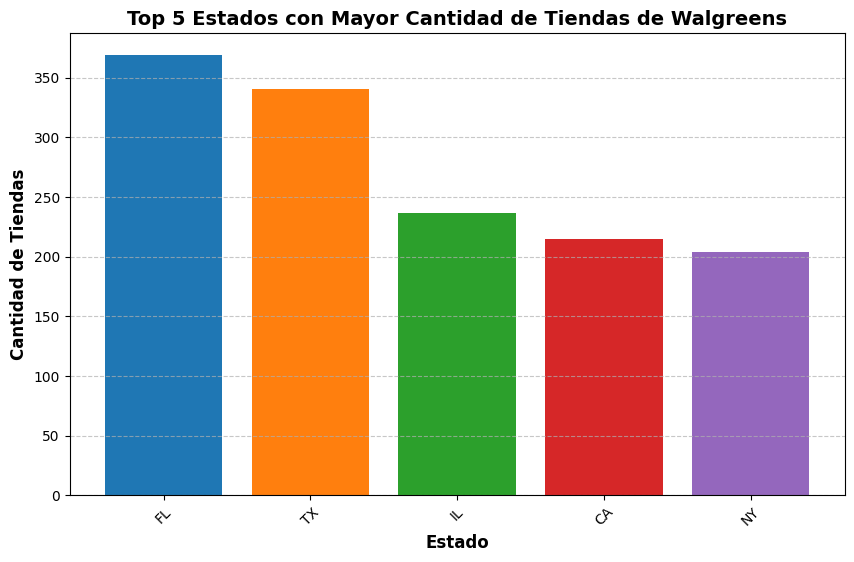

In [78]:
# Agrupamos los datos por estado y contamos la cantidad de tiendas de Walgreens en cada estado
stores_per_state = (
    df_walgreens.groupby("state_us").size().reset_index(name="store_count")
)

# Creamos un diccionario que mapee los nombres de los estados a su cantidad correspondiente de tiendas
state_store_count = dict(
    zip(stores_per_state["state_us"], stores_per_state["store_count"])
)

# Ordenamos el diccionario por la cantidad de tiendas en orden descendente
sorted_state_store_count = dict(
    sorted(state_store_count.items(), key=lambda item: item[1], reverse=True)
)

# Tomamos los primeros 5 elementos del diccionario ordenado
top_5_states = dict(list(sorted_state_store_count.items())[:5])

# Generamos una lista de colores diferentes
colores2 = plt.cm.tab10(np.arange(len(top_5_states)))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_states.keys(), top_5_states.values(), color=colores2)
plt.title(
    "Top 5 Estados con Mayor Cantidad de Tiendas de Walgreens",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Estado", fontsize=12, fontweight="bold")
plt.ylabel("Cantidad de Tiendas", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 2.4. Exportación de DataSet Limpia

In [ ]:
# Se guarda el dataframe transformado como "categories_id"
archivo_limpio_parquet1 = (
    "/content/drive/MyDrive/PF-YELP-GOOGLE/Dataset_Limpia/categories_id.parquet"
)
df_sitios_categories_resultado.to_parquet(archivo_limpio_parquet1, engine="pyarrow")
print(f"Se guardó el archivo {archivo_limpio_parquet1}")

Se guardó el archivo /content/drive/MyDrive/PF-YELP-GOOGLE/Dataset_Limpia/categories_id.parquet


In [ ]:
# Se guarda el dataframe limpio como "df_final_convenience_clean"
archivo_limpio_parquet3 = (
    "/content/drive/MyDrive/PF-YELP-GOOGLE/Dataset_Limpia/df_convenience_clean.parquet"
)
df_final_convenience.to_parquet(archivo_limpio_parquet3, engine="pyarrow")
print(f"Se guardó el archivo {archivo_limpio_parquet3}")

Se guardó el archivo /content/drive/MyDrive/PF-YELP-GOOGLE/Dataset_Limpia/df_convenience_clean.parquet
